In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/25


/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0573 - loss: 3.0666 - val_accuracy: 0.1375 - val_loss: 2.6708
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1488 - loss: 2.6767 - val_accuracy: 0.1792 - val_loss: 2.6152
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1660 - loss: 2.6097 - val_accuracy: 0.2208 - val_loss: 2.5456
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2008 - loss: 2.5026 - val_accuracy: 0.2583 - val_loss: 2.4731
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2184 - loss: 2.4343 - val_accuracy: 0.2583 - val_loss: 2.4378
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2290 - loss: 2.3816 - val_accuracy: 0.2625 - val_loss: 2.4085
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2647 - loss: 2.3087 - val_accuracy: 0.2542 - val_loss: 2.3864
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2675 - loss: 2.2444 - val_accuracy: 0.2375 - val_loss: 2.3802
Ep

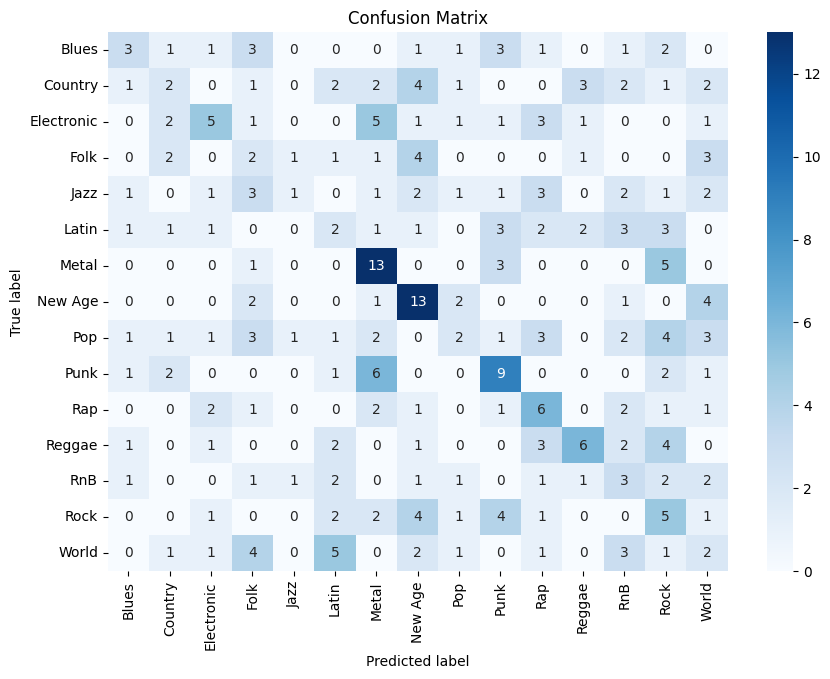

ROC AUC Score: 0.71


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming X_scaled and y_encoded are already prepared
# X_scaled is your feature data, y_encoded is your target labels (as integers)

# Split the dataset into training and test sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert the target labels (y_train_nn, y_test_nn) to one-hot encoded format for training
y_train_nn_one_hot = to_categorical(y_train_nn, num_classes=len(np.unique(y_encoded)))
y_test_nn_one_hot = to_categorical(y_test_nn, num_classes=len(np.unique(y_encoded)))

# Define the neural network model
model_nn = Sequential([
    Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Output layer for classification
])

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_nn.fit(X_train_nn, y_train_nn_one_hot, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test set
predictions = model_nn.predict(X_test_nn)

# Get the predicted class indices (from softmax output)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class indices (argmax if using one-hot encoding)
y_test_nn_int = np.argmax(y_test_nn_one_hot, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_nn_int, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Optionally, you can also inverse transform the predicted classes back to original labels (if needed)
# predicted_genres = label_encoder.inverse_transform(predicted_classes)


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

Epoch 1/50


/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0865 - loss: 15.8172 - val_accuracy: 0.1625 - val_loss: 14.4145 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1571 - loss: 14.3839 - val_accuracy: 0.1375 - val_loss: 13.4463 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1698 - loss: 13.2268 - val_accuracy: 0.1583 - val_loss: 12.4479 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1998 - loss: 12.1123 - val_accuracy: 0.1458 - val_loss: 11.5052 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2430 - loss: 11.1170 - val_accuracy: 0.1375 - val_loss: 10.6026 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2305 - loss: 10.2720 - val_accuracy: 0.1667 - val_loss: 9.7768 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2512 - loss: 9.4076 - val_acc

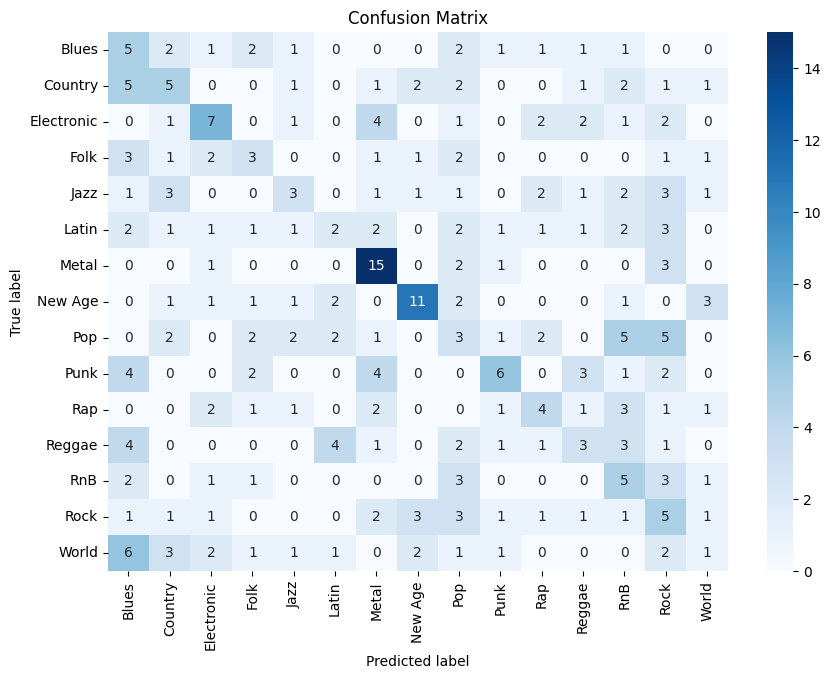

ROC AUC Score: 0.69


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_scaled and y_encoded are already prepared
# X_scaled is your feature data, y_encoded is your target labels (as integers)

# Split the dataset into training and test sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert the target labels (y_train_nn, y_test_nn) to one-hot encoded format for training
y_train_nn_one_hot = to_categorical(y_train_nn, num_classes=len(np.unique(y_encoded)))
y_test_nn_one_hot = to_categorical(y_test_nn, num_classes=len(np.unique(y_encoded)))

# Define a fully connected dense model
model_nn = Sequential([
    # First dense layer
    Dense(1024, input_dim=X_train_nn.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    BatchNormalization(),

    # Second dense layer
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    BatchNormalization(),

    # Third dense layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    BatchNormalization(),

    # Fourth dense layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    
    # Output layer (softmax activation for multi-class classification)
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Train the model with the specified callbacks
history = model_nn.fit(X_train_nn, y_train_nn_one_hot, epochs=50, batch_size=32, validation_split=0.2, 
                       callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test set
predictions = model_nn.predict(X_test_nn)

# Get the predicted class indices (from softmax output)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class indices (argmax if using one-hot encoding)
y_test_nn_int = np.argmax(y_test_nn_one_hot, axis=1)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nn_int, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


Epoch 1/50


/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.0698 - loss: 27.8209 - val_accuracy: 0.1958 - val_loss: 25.8162 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.1299 - loss: 25.9247 - val_accuracy: 0.2458 - val_loss: 24.1805 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.1407 - loss: 24.1586 - val_accuracy: 0.2250 - val_loss: 22.3997 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.1994 - loss: 22.0429 - val_accuracy: 0.2083 - val_loss: 20.6221 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1973 - loss: 20.2396 - val_accuracy: 0.1667 - val_loss: 18.9347 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2320 - loss: 18.5011 - val_accuracy: 0.1333 - val_loss: 17.3643 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2391 - loss: 16.8609 - val

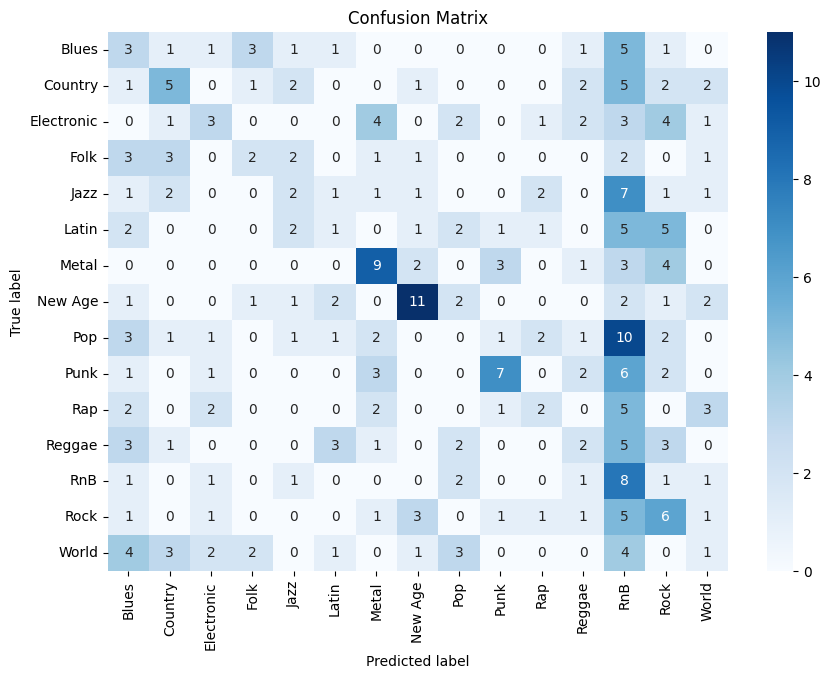

ROC AUC Score: 0.69


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming X_scaled and y_encoded are already prepared
# X_scaled is your feature data, y_encoded is your target labels (as integers)

# Split the dataset into training and test sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert the target labels (y_train_nn, y_test_nn) to one-hot encoded format for training
y_train_nn_one_hot = to_categorical(y_train_nn, num_classes=len(np.unique(y_encoded)))
y_test_nn_one_hot = to_categorical(y_test_nn, num_classes=len(np.unique(y_encoded)))

# Define a more complex model with additional layers and regularization
model_nn = Sequential([
    # First dense layer
    Dense(2048, input_dim=X_train_nn.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    BatchNormalization(),

    # Second dense layer
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    BatchNormalization(),

    # Third dense layer
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),

    # Fourth dense layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    
    # Output layer (softmax activation for multi-class classification)
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model with Adam optimizer and a learning rate decay schedule
optimizer = Adam(learning_rate=0.001)
model_nn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.0001)

# Train the model with the specified callbacks
history = model_nn.fit(X_train_nn, y_train_nn_one_hot, epochs=50, batch_size=64, validation_split=0.2, 
                       callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test set
predictions = model_nn.predict(X_test_nn)

# Get the predicted class indices (from softmax output)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class indices (argmax if using one-hot encoding)
y_test_nn_int = np.argmax(y_test_nn_one_hot, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_nn_int, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


Shape of X_train_nn: (1200, 20)
Shape of y_train_nn_one_hot: (1200, 15)
Epoch 1/50


/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0605 - loss: 9.0339 - val_accuracy: 0.1933 - val_loss: 7.6978
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1059 - loss: 8.0834 - val_accuracy: 0.2033 - val_loss: 7.2480
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1334 - loss: 7.4650 - val_accuracy: 0.2200 - val_loss: 6.8575
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1424 - loss: 6.9570 - val_accuracy: 0.2500 - val_loss: 6.4611
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1420 - loss: 6.6042 - val_accuracy: 0.2800 - val_loss: 6.0898
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1621 - loss: 6.2281 - val_accuracy: 0.2700 - val_loss: 5.7316
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2053 - loss: 5.7760 - val_accuracy: 0.2533 - val_loss: 5.4178
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1973 - loss: 5.4731 - val_accuracy: 0.3033 - val_loss: 5.1460
E

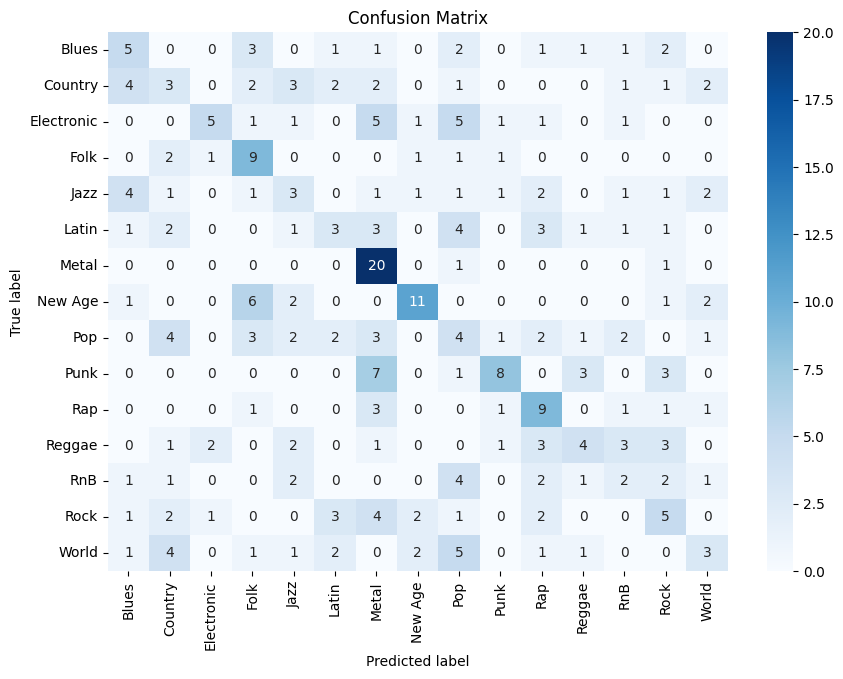

ROC AUC Score: 0.75


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric = ['energy', 'key', 'valence', 'tempo_x', 'time_signature', 
                'chroma_stft_mean', 'chroma_stft_var', 'rms_var', 
                'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 
                'perceptr_mean', 'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 
                'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 
                'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 
                'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 
                'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

# Feature matrix and target vector
X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Random Forest (optional step to select top features)
# Fit a RandomForestClassifier to identify important features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_encoded)

# Get feature importances and select the top features (e.g., top 20)
important_features = np.argsort(rf.feature_importances_)[::-1][:20]
X_scaled_selected = X_scaled[:, important_features]

# One-hot encode the target labels
y_encoded_one_hot = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

# Split the dataset into training and test sets
X_train_nn, X_test_nn, y_train_nn_one_hot, y_test_nn_one_hot = train_test_split(
    X_scaled_selected, y_encoded_one_hot, test_size=0.2, random_state=42
)

# Check the shapes of the data to make sure they match
print(f"Shape of X_train_nn: {X_train_nn.shape}")
print(f"Shape of y_train_nn_one_hot: {y_train_nn_one_hot.shape}")

# Define a function that builds the model
def build_model(neurons=512, dropout_rate=0.5, learning_rate=0.001, activation='relu'):
    model = Sequential()
    
    # First layer
    model.add(Dense(neurons, input_dim=X_train_nn.shape[1], kernel_regularizer=l2(0.01)))
    if activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    # Second layer
    model.add(Dense(neurons // 2, kernel_regularizer=l2(0.01)))
    if activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    # Third layer
    model.add(Dense(neurons // 4, kernel_regularizer=l2(0.01)))
    if activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model with chosen hyperparameters
model_nn = build_model(neurons=512, dropout_rate=0.5, learning_rate=0.001, activation='relu')

# Train the model
history = model_nn.fit(X_train_nn, y_train_nn_one_hot, epochs=50, batch_size=32, validation_data=(X_test_nn, y_test_nn_one_hot), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test set
predictions = model_nn.predict(X_test_nn)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_nn_one_hot, axis=1), predicted_classes)  # Convert one-hot back to class indices
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


Epoch 1/50


/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/workspaces/TeamTBD_SongClassifier/.conda/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0838 - loss: 15.7084 - val_accuracy: 0.1917 - val_loss: 14.2629 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1495 - loss: 14.2235 - val_accuracy: 0.1833 - val_loss: 13.2013 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2000 - loss: 13.0288 - val_accuracy: 0.1667 - val_loss: 12.1622 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1896 - loss: 11.9494 - val_accuracy: 0.1833 - val_loss: 11.1811 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2292 - loss: 10.8641 - val_accuracy: 0.1583 - val_loss: 10.2641 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2498 - loss: 9.8319 - val_accuracy: 0.1792 - val_loss: 9.4246 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2270 - loss: 9.0836 - val_accuracy

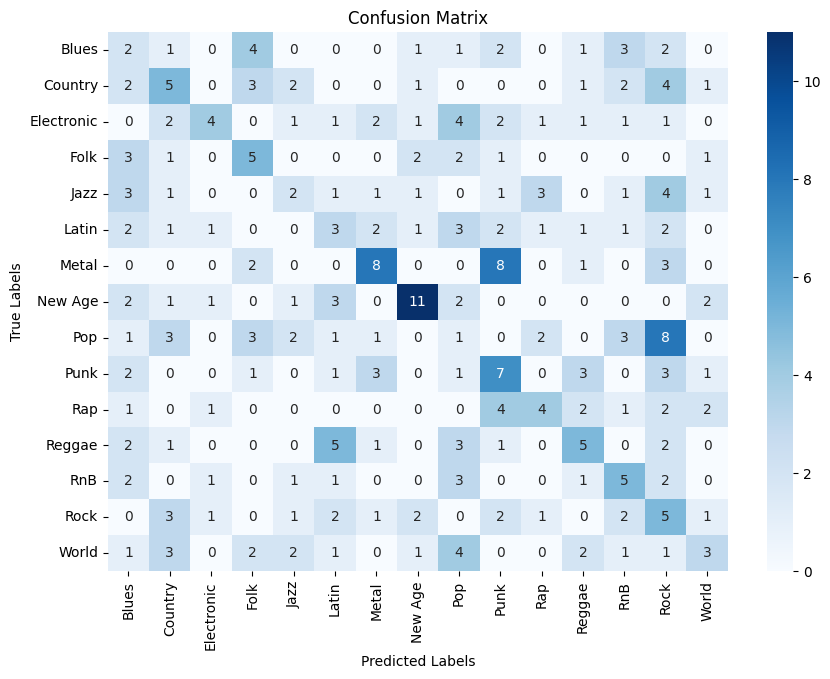

ROC AUC Score: 0.71


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 
               'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 
               'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 
               'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 
               'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 
               'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

# Separate features and target variable
X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels
y_encoded_one_hot = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

# Split the dataset into training and test sets
X_train_nn, X_test_nn, y_train_nn_one_hot, y_test_nn_one_hot = train_test_split(
    X_scaled, y_encoded_one_hot, test_size=0.2, random_state=42
)

# Define the model with architectural improvements, regularization, and batch normalization
model_nn = Sequential([
    # First dense layer with regularization and activation
    Dense(1024, input_dim=X_train_nn.shape[1], kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    BatchNormalization(),

    # Second dense layer
    Dense(512, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    BatchNormalization(),

    # Third dense layer
    Dense(256, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    BatchNormalization(),

    # Fourth dense layer
    Dense(128, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    
    # Output layer with softmax activation
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model with the Adam optimizer
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction callback to adjust the learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Train the model with the specified callbacks
history = model_nn.fit(X_train_nn, y_train_nn_one_hot, epochs=50, batch_size=32, validation_split=0.2, 
                       callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test set
predictions = model_nn.predict(X_test_nn)

# Get the predicted class indices (from softmax output)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class indices (argmax if using one-hot encoding)
y_test_nn_int = np.argmax(y_test_nn_one_hot, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_nn_int, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix (optional, for visualization)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally: Compute ROC AUC score (for multi-class classification, you can use macro average)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test_nn_one_hot, predictions, average='macro', multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")
